In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import csv
import json
import gmaps
#importing libraries

In [2]:
#Checking crime categories
url_crime_cat = "https://data.police.uk/api/crime-categories?date=2020"
response_crime_cat = requests.get(url_crime_cat).json()
response_crime_cat

[{'url': 'all-crime', 'name': 'All crime'},
 {'url': 'anti-social-behaviour', 'name': 'Anti-social behaviour'},
 {'url': 'bicycle-theft', 'name': 'Bicycle theft'},
 {'url': 'burglary', 'name': 'Burglary'},
 {'url': 'criminal-damage-arson', 'name': 'Criminal damage and arson'},
 {'url': 'drugs', 'name': 'Drugs'},
 {'url': 'other-theft', 'name': 'Other theft'},
 {'url': 'possession-of-weapons', 'name': 'Possession of weapons'},
 {'url': 'public-order', 'name': 'Public order'},
 {'url': 'robbery', 'name': 'Robbery'},
 {'url': 'shoplifting', 'name': 'Shoplifting'},
 {'url': 'theft-from-the-person', 'name': 'Theft from the person'},
 {'url': 'vehicle-crime', 'name': 'Vehicle crime'},
 {'url': 'violent-crime', 'name': 'Violence and sexual offences'},
 {'url': 'other-crime', 'name': 'Other crime'}]

In [3]:
#checking Police Forces that exist
url_forces = "https://data.police.uk/api/forces"
response_forces = requests.get(url_forces).json()
response_forces


[{'id': 'avon-and-somerset', 'name': 'Avon and Somerset Constabulary'},
 {'id': 'bedfordshire', 'name': 'Bedfordshire Police'},
 {'id': 'cambridgeshire', 'name': 'Cambridgeshire Constabulary'},
 {'id': 'cheshire', 'name': 'Cheshire Constabulary'},
 {'id': 'city-of-london', 'name': 'City of London Police'},
 {'id': 'cleveland', 'name': 'Cleveland Police'},
 {'id': 'cumbria', 'name': 'Cumbria Constabulary'},
 {'id': 'derbyshire', 'name': 'Derbyshire Constabulary'},
 {'id': 'devon-and-cornwall', 'name': 'Devon & Cornwall Police'},
 {'id': 'dorset', 'name': 'Dorset Police'},
 {'id': 'durham', 'name': 'Durham Constabulary'},
 {'id': 'dyfed-powys', 'name': 'Dyfed-Powys Police'},
 {'id': 'essex', 'name': 'Essex Police'},
 {'id': 'gloucestershire', 'name': 'Gloucestershire Constabulary'},
 {'id': 'greater-manchester', 'name': 'Greater Manchester Police'},
 {'id': 'gwent', 'name': 'Gwent Police'},
 {'id': 'hampshire', 'name': 'Hampshire Constabulary'},
 {'id': 'hertfordshire', 'name': 'Hertford

In [4]:
#Creating a function for concatetning a URL into a format that can be parsed by API call 
#it takes 3 variables: URL string, date,and shortened list of coordinates 
#cuz it crashed if there are more than ~ 140 coordinates in an URl
def fun_gigastr(gigastr,date,lat_lon_zipped_shortened):
    try:
        for i in range(len(lat_lon_zipped_shortened)):
            for j in range(2):
                if j == 0:
                    a = ","
                    gigastr = gigastr  + str(lat_lon_zipped_shortened[i][j]) + a
                else:
                    a = ":"
                    gigastr = gigastr  + str(lat_lon_zipped_shortened[i][j]) + a
    finally:
        gigastr = gigastr + date
    return gigastr

In [5]:
#Our Parser, if you want to retrieve a data from different API call like stop and search or else, just change the link.
#Feel free to add any other lists or whatever you need to retrieve the data that you need
data ={}
data_category =[]
data_lat = []
data_lon = []
data_outcome = []
data_month = []
data_neighbourhood = []



gigastr ="https://data.police.uk/api/crimes-street/all-crime?poly="
date_number = ["01","02","03","04","05","06","07","08","09","10","11","12"]

west_midlands_neighbourhoods = []
west_midlands_ids = []

#URL for the list of existing neighbourhoods in "west-midlands"

url_west_midlands_police_neighbourhoods = "https://data.police.uk/api/west-midlands/neighbourhoods"
response_west_midlands_police_neighbourhoods = requests.get(url_west_midlands_police_neighbourhoods).json()

#Retriving neighbourhoods
for u in response_west_midlands_police_neighbourhoods:
    west_midlands_neighbourhoods.append(u)
    
#Getting Neighbourhoods IDs that we will insert into function
for k in range(len(west_midlands_neighbourhoods)):
    west_midlands_ids.append(west_midlands_neighbourhoods[k]["id"])

#The Parser begins here: first we get boundaries coordinates for each boundary from API   
for h in west_midlands_ids:

    url_boundary = f"https://data.police.uk/api/west-midlands/{h}/boundary"
    response_boundary = requests.get(url_boundary).json()
    print(f"---Trying to get data for : {h}---")
    
    lat_lon_pairs = []
    lat = []
    lon = []

#We insert lat and lon in separate lists
    for o in response_boundary:
        lat_lon_pairs.append(o)
#We zip them together in pairs to form a coresponding pair
    for p in range(len(lat_lon_pairs)):  
        lat.append(lat_lon_pairs[p]["latitude"])
        lon.append(lat_lon_pairs[p]["longitude"])
        lat_lon_zipped = list(zip(lat,lon))
#Now we have list of pairs and individual values for ease of use. Tiny chance it might be redundant a bit but whatever lol

#Now we shorten the coordinate list cuz after ~140 pair in an url it will crash.
    for j in date_number:
        if len(lat_lon_zipped)>4500:
            lat_lon_zipped_shortened = lat_lon_zipped[::100]
        if len(lat_lon_zipped)>4000:
            lat_lon_zipped_shortened = lat_lon_zipped[::40]
        if len(lat_lon_zipped)>3500:
            lat_lon_zipped_shortened = lat_lon_zipped[::35]
        if len(lat_lon_zipped)>3000:
            lat_lon_zipped_shortened = lat_lon_zipped[::30]
        if len(lat_lon_zipped)>2500:
            lat_lon_zipped_shortened = lat_lon_zipped[::25]    
        if len(lat_lon_zipped)>2000:
            lat_lon_zipped_shortened = lat_lon_zipped[::20]    
        if len(lat_lon_zipped)>1500:
            lat_lon_zipped_shortened = lat_lon_zipped[::15]
        else:
            lat_lon_zipped_shortened = lat_lon_zipped[::10]
        print(f"We've got {len(lat_lon_zipped)} coordinates to work with")    
        print(f"Total coordinates that we work with is: {len(lat_lon_zipped_shortened)}")
#Now we start looping over the date and our function, getting data. Feel free to change the url in a function or make a new one
#Do note it might easily take you ~10-15 minutes for the function to finish. Go brew yourself a coffee or smthing.
        date = f"&date=2020-{j}"
        print(f"Date is: {date}")
        fun_gigastr(gigastr,date,lat_lon_zipped_shortened)
        response_crime = requests.get(fun_gigastr(gigastr,date,lat_lon_zipped_shortened)).json()   
#This is a tricky one, now we append our lists of data with Try function and if there is no data point for it
#then it will use Except to add "NaN". 
#Neighbourhood will be in only the first row, feel free to change this chunk to add it in all rows if you find a way how to.  


        for i in range(len(response_crime)):
            try:
                data_category.append(response_crime[i]["category"])
                data["Category"] = data_category
            except:    
                data["Category"] = ""
            try:
                data_lat.append(response_crime[i]["location"]["latitude"])
                data["Latitude"] = data_lat
            except:
                data["Latitude"] = ""
            try:
                data_lon.append(response_crime[i]["location"]["longitude"])
                data["Longitude"] = data_lon
            except:
                data["Longitude"] = ""
            try:
                data_outcome.append(response_crime[i]["outcome_status"]["category"])
                data["Outcome"] = data_outcome
            except:
                data["Outcome"] = ""
            try:
                data_month.append(response_crime[i]["month"])
                data["Date"] = data_month
            except:
                data["Date"] = ""
            try:
                data_neighbourhood.append(h)
                data["Neighbourhood"] = data_neighbourhood
            except:
                data["Neighbourhood"] = ""
    print(f"---At the end we fetched data for: {h} Neighbourhood---")

---Trying to get data for : BE001---
We've got 1755 coordinates to work with
Total coordinates that we work with is: 117
Date is: &date=2020-01
We've got 1755 coordinates to work with
Total coordinates that we work with is: 117
Date is: &date=2020-02
We've got 1755 coordinates to work with
Total coordinates that we work with is: 117
Date is: &date=2020-03
We've got 1755 coordinates to work with
Total coordinates that we work with is: 117
Date is: &date=2020-04
We've got 1755 coordinates to work with
Total coordinates that we work with is: 117
Date is: &date=2020-05
We've got 1755 coordinates to work with
Total coordinates that we work with is: 117
Date is: &date=2020-06
We've got 1755 coordinates to work with
Total coordinates that we work with is: 117
Date is: &date=2020-07
We've got 1755 coordinates to work with
Total coordinates that we work with is: 117
Date is: &date=2020-08
We've got 1755 coordinates to work with
Total coordinates that we work with is: 117
Date is: &date=2020-09


---Trying to get data for : BE007---
We've got 765 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-01
We've got 765 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-02
We've got 765 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-03
We've got 765 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-04
We've got 765 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-05
We've got 765 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-06
We've got 765 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-07
We've got 765 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-08
We've got 765 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-09
We've got 765 coor

---Trying to get data for : BE013---
We've got 597 coordinates to work with
Total coordinates that we work with is: 60
Date is: &date=2020-01
We've got 597 coordinates to work with
Total coordinates that we work with is: 60
Date is: &date=2020-02
We've got 597 coordinates to work with
Total coordinates that we work with is: 60
Date is: &date=2020-03
We've got 597 coordinates to work with
Total coordinates that we work with is: 60
Date is: &date=2020-04
We've got 597 coordinates to work with
Total coordinates that we work with is: 60
Date is: &date=2020-05
We've got 597 coordinates to work with
Total coordinates that we work with is: 60
Date is: &date=2020-06
We've got 597 coordinates to work with
Total coordinates that we work with is: 60
Date is: &date=2020-07
We've got 597 coordinates to work with
Total coordinates that we work with is: 60
Date is: &date=2020-08
We've got 597 coordinates to work with
Total coordinates that we work with is: 60
Date is: &date=2020-09
We've got 597 coor

We've got 2047 coordinates to work with
Total coordinates that we work with is: 137
Date is: &date=2020-02
We've got 2047 coordinates to work with
Total coordinates that we work with is: 137
Date is: &date=2020-03
We've got 2047 coordinates to work with
Total coordinates that we work with is: 137
Date is: &date=2020-04
We've got 2047 coordinates to work with
Total coordinates that we work with is: 137
Date is: &date=2020-05
We've got 2047 coordinates to work with
Total coordinates that we work with is: 137
Date is: &date=2020-06
We've got 2047 coordinates to work with
Total coordinates that we work with is: 137
Date is: &date=2020-07
We've got 2047 coordinates to work with
Total coordinates that we work with is: 137
Date is: &date=2020-08
We've got 2047 coordinates to work with
Total coordinates that we work with is: 137
Date is: &date=2020-09
We've got 2047 coordinates to work with
Total coordinates that we work with is: 137
Date is: &date=2020-10
We've got 2047 coordinates to work wi

We've got 670 coordinates to work with
Total coordinates that we work with is: 67
Date is: &date=2020-02
We've got 670 coordinates to work with
Total coordinates that we work with is: 67
Date is: &date=2020-03
We've got 670 coordinates to work with
Total coordinates that we work with is: 67
Date is: &date=2020-04
We've got 670 coordinates to work with
Total coordinates that we work with is: 67
Date is: &date=2020-05
We've got 670 coordinates to work with
Total coordinates that we work with is: 67
Date is: &date=2020-06
We've got 670 coordinates to work with
Total coordinates that we work with is: 67
Date is: &date=2020-07
We've got 670 coordinates to work with
Total coordinates that we work with is: 67
Date is: &date=2020-08
We've got 670 coordinates to work with
Total coordinates that we work with is: 67
Date is: &date=2020-09
We've got 670 coordinates to work with
Total coordinates that we work with is: 67
Date is: &date=2020-10
We've got 670 coordinates to work with
Total coordinate

We've got 1995 coordinates to work with
Total coordinates that we work with is: 133
Date is: &date=2020-04
We've got 1995 coordinates to work with
Total coordinates that we work with is: 133
Date is: &date=2020-05
We've got 1995 coordinates to work with
Total coordinates that we work with is: 133
Date is: &date=2020-06
We've got 1995 coordinates to work with
Total coordinates that we work with is: 133
Date is: &date=2020-07
We've got 1995 coordinates to work with
Total coordinates that we work with is: 133
Date is: &date=2020-08
We've got 1995 coordinates to work with
Total coordinates that we work with is: 133
Date is: &date=2020-09
We've got 1995 coordinates to work with
Total coordinates that we work with is: 133
Date is: &date=2020-10
We've got 1995 coordinates to work with
Total coordinates that we work with is: 133
Date is: &date=2020-11
We've got 1995 coordinates to work with
Total coordinates that we work with is: 133
Date is: &date=2020-12
---At the end we fetched data for: BW

We've got 400 coordinates to work with
Total coordinates that we work with is: 40
Date is: &date=2020-04
We've got 400 coordinates to work with
Total coordinates that we work with is: 40
Date is: &date=2020-05
We've got 400 coordinates to work with
Total coordinates that we work with is: 40
Date is: &date=2020-06
We've got 400 coordinates to work with
Total coordinates that we work with is: 40
Date is: &date=2020-07
We've got 400 coordinates to work with
Total coordinates that we work with is: 40
Date is: &date=2020-08
We've got 400 coordinates to work with
Total coordinates that we work with is: 40
Date is: &date=2020-09
We've got 400 coordinates to work with
Total coordinates that we work with is: 40
Date is: &date=2020-10
We've got 400 coordinates to work with
Total coordinates that we work with is: 40
Date is: &date=2020-11
We've got 400 coordinates to work with
Total coordinates that we work with is: 40
Date is: &date=2020-12
---At the end we fetched data for: BW018 Neighbourhood-

We've got 720 coordinates to work with
Total coordinates that we work with is: 72
Date is: &date=2020-04
We've got 720 coordinates to work with
Total coordinates that we work with is: 72
Date is: &date=2020-05
We've got 720 coordinates to work with
Total coordinates that we work with is: 72
Date is: &date=2020-06
We've got 720 coordinates to work with
Total coordinates that we work with is: 72
Date is: &date=2020-07
We've got 720 coordinates to work with
Total coordinates that we work with is: 72
Date is: &date=2020-08
We've got 720 coordinates to work with
Total coordinates that we work with is: 72
Date is: &date=2020-09
We've got 720 coordinates to work with
Total coordinates that we work with is: 72
Date is: &date=2020-10
We've got 720 coordinates to work with
Total coordinates that we work with is: 72
Date is: &date=2020-11
We've got 720 coordinates to work with
Total coordinates that we work with is: 72
Date is: &date=2020-12
---At the end we fetched data for: BW024 Neighbourhood-

We've got 2261 coordinates to work with
Total coordinates that we work with is: 151
Date is: &date=2020-05
We've got 2261 coordinates to work with
Total coordinates that we work with is: 151
Date is: &date=2020-06
We've got 2261 coordinates to work with
Total coordinates that we work with is: 151
Date is: &date=2020-07
We've got 2261 coordinates to work with
Total coordinates that we work with is: 151
Date is: &date=2020-08
We've got 2261 coordinates to work with
Total coordinates that we work with is: 151
Date is: &date=2020-09
We've got 2261 coordinates to work with
Total coordinates that we work with is: 151
Date is: &date=2020-10
We've got 2261 coordinates to work with
Total coordinates that we work with is: 151
Date is: &date=2020-11
We've got 2261 coordinates to work with
Total coordinates that we work with is: 151
Date is: &date=2020-12
---At the end we fetched data for: CV012 Neighbourhood---
---Trying to get data for : CV013---
We've got 565 coordinates to work with
Total coor

We've got 527 coordinates to work with
Total coordinates that we work with is: 53
Date is: &date=2020-06
We've got 527 coordinates to work with
Total coordinates that we work with is: 53
Date is: &date=2020-07
We've got 527 coordinates to work with
Total coordinates that we work with is: 53
Date is: &date=2020-08
We've got 527 coordinates to work with
Total coordinates that we work with is: 53
Date is: &date=2020-09
We've got 527 coordinates to work with
Total coordinates that we work with is: 53
Date is: &date=2020-10
We've got 527 coordinates to work with
Total coordinates that we work with is: 53
Date is: &date=2020-11
We've got 527 coordinates to work with
Total coordinates that we work with is: 53
Date is: &date=2020-12
---At the end we fetched data for: DY004 Neighbourhood---
---Trying to get data for : DY005---
We've got 468 coordinates to work with
Total coordinates that we work with is: 47
Date is: &date=2020-01
We've got 468 coordinates to work with
Total coordinates that we 

We've got 541 coordinates to work with
Total coordinates that we work with is: 55
Date is: &date=2020-07
We've got 541 coordinates to work with
Total coordinates that we work with is: 55
Date is: &date=2020-08
We've got 541 coordinates to work with
Total coordinates that we work with is: 55
Date is: &date=2020-09
We've got 541 coordinates to work with
Total coordinates that we work with is: 55
Date is: &date=2020-10
We've got 541 coordinates to work with
Total coordinates that we work with is: 55
Date is: &date=2020-11
We've got 541 coordinates to work with
Total coordinates that we work with is: 55
Date is: &date=2020-12
---At the end we fetched data for: SH005 Neighbourhood---
---Trying to get data for : SH006---
We've got 1876 coordinates to work with
Total coordinates that we work with is: 126
Date is: &date=2020-01
We've got 1876 coordinates to work with
Total coordinates that we work with is: 126
Date is: &date=2020-02
We've got 1876 coordinates to work with
Total coordinates tha

We've got 624 coordinates to work with
Total coordinates that we work with is: 63
Date is: &date=2020-07
We've got 624 coordinates to work with
Total coordinates that we work with is: 63
Date is: &date=2020-08
We've got 624 coordinates to work with
Total coordinates that we work with is: 63
Date is: &date=2020-09
We've got 624 coordinates to work with
Total coordinates that we work with is: 63
Date is: &date=2020-10
We've got 624 coordinates to work with
Total coordinates that we work with is: 63
Date is: &date=2020-11
We've got 624 coordinates to work with
Total coordinates that we work with is: 63
Date is: &date=2020-12
---At the end we fetched data for: SW003 Neighbourhood---
---Trying to get data for : SW004---
We've got 2403 coordinates to work with
Total coordinates that we work with is: 161
Date is: &date=2020-01
We've got 2403 coordinates to work with
Total coordinates that we work with is: 161
Date is: &date=2020-02
We've got 2403 coordinates to work with
Total coordinates tha

We've got 488 coordinates to work with
Total coordinates that we work with is: 49
Date is: &date=2020-08
We've got 488 coordinates to work with
Total coordinates that we work with is: 49
Date is: &date=2020-09
We've got 488 coordinates to work with
Total coordinates that we work with is: 49
Date is: &date=2020-10
We've got 488 coordinates to work with
Total coordinates that we work with is: 49
Date is: &date=2020-11
We've got 488 coordinates to work with
Total coordinates that we work with is: 49
Date is: &date=2020-12
---At the end we fetched data for: WS003 Neighbourhood---
---Trying to get data for : WS004---
We've got 769 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-01
We've got 769 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-02
We've got 769 coordinates to work with
Total coordinates that we work with is: 77
Date is: &date=2020-03
We've got 769 coordinates to work with
Total coordinates that we 

We've got 1457 coordinates to work with
Total coordinates that we work with is: 146
Date is: &date=2020-09
We've got 1457 coordinates to work with
Total coordinates that we work with is: 146
Date is: &date=2020-10
We've got 1457 coordinates to work with
Total coordinates that we work with is: 146
Date is: &date=2020-11
We've got 1457 coordinates to work with
Total coordinates that we work with is: 146
Date is: &date=2020-12
---At the end we fetched data for: WS009 Neighbourhood---
---Trying to get data for : WV001---
We've got 455 coordinates to work with
Total coordinates that we work with is: 46
Date is: &date=2020-01
We've got 455 coordinates to work with
Total coordinates that we work with is: 46
Date is: &date=2020-02
We've got 455 coordinates to work with
Total coordinates that we work with is: 46
Date is: &date=2020-03
We've got 455 coordinates to work with
Total coordinates that we work with is: 46
Date is: &date=2020-04
We've got 455 coordinates to work with
Total coordinates 

We've got 1375 coordinates to work with
Total coordinates that we work with is: 138
Date is: &date=2020-09
We've got 1375 coordinates to work with
Total coordinates that we work with is: 138
Date is: &date=2020-10
We've got 1375 coordinates to work with
Total coordinates that we work with is: 138
Date is: &date=2020-11
We've got 1375 coordinates to work with
Total coordinates that we work with is: 138
Date is: &date=2020-12
---At the end we fetched data for: WV006 Neighbourhood---
---Trying to get data for : WV007---
We've got 561 coordinates to work with
Total coordinates that we work with is: 57
Date is: &date=2020-01
We've got 561 coordinates to work with
Total coordinates that we work with is: 57
Date is: &date=2020-02
We've got 561 coordinates to work with
Total coordinates that we work with is: 57
Date is: &date=2020-03
We've got 561 coordinates to work with
Total coordinates that we work with is: 57
Date is: &date=2020-04
We've got 561 coordinates to work with
Total coordinates 

In [6]:
data

{'Category': ['anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'anti-social-behaviour',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'burglary',
  'criminal-damage-arson',
  'criminal-damage-arson',
  'criminal-damage-arson',
  'criminal-damage-arson',
  'criminal-damage-arson',
  'criminal-damage-arson',
  'criminal-damage-arson',
  'crimi

In [488]:
#Here we change our dictionary into Series, i works on headers, j works on the rest of data rows. 
#Check out documentation for .items function
data_df = pd.DataFrame({i:pd.Series(j) for i, j in data.items()})


In [489]:
data_df

,Category,Latitude,Longitude,Outcome,Date,Neighbourhood
0,anti-social-behaviour,52.522695,-1.842639,Investigation complete; no suspect identified,2020-01,BE001
1,anti-social-behaviour,52.532120,-1.826257,Investigation complete; no suspect identified,2020-01,BE001
2,anti-social-behaviour,52.529918,-1.826177,Investigation complete; no suspect identified,2020-01,BE001
3,anti-social-behaviour,52.530821,-1.849008,Investigation complete; no suspect identified,2020-01,BE001
4,anti-social-behaviour,52.522863,-1.840708,Investigation complete; no suspect identified,2020-01,BE001
...,...,...,...,...,...,...
322754,violent-crime,52.615633,-2.055535,NaN,2020-12,WV008
322755,violent-crime,52.610128,-2.061095,NaN,2020-12,WV008
322756,other-crime,52.612523,-2.054423,NaN,2020-12,WV008
322757,other-crime,52.600143,-2.056977,NaN,2020-12,WV008


In [490]:
data_df["Outcome"].unique()

array(['Investigation complete; no suspect identified',
       'Court result unavailable', 'Status update unavailable',
       'Unable to prosecute suspect',
       'Formal action is not in the public interest', 'Local resolution',
       'Action to be taken by another organisation',
       'Offender given a caution',
       'Suspect charged as part of another case',
       'Offender given a drugs possession warning',
       'Offender given penalty notice', 'Awaiting court outcome',
       'Further investigation is not in the public interest',
       'Further action is not in the public interest', nan], dtype=object)

In [491]:
data_df

,Category,Latitude,Longitude,Outcome,Date,Neighbourhood
0,anti-social-behaviour,52.522695,-1.842639,Investigation complete; no suspect identified,2020-01,BE001
1,anti-social-behaviour,52.532120,-1.826257,Investigation complete; no suspect identified,2020-01,BE001
2,anti-social-behaviour,52.529918,-1.826177,Investigation complete; no suspect identified,2020-01,BE001
3,anti-social-behaviour,52.530821,-1.849008,Investigation complete; no suspect identified,2020-01,BE001
4,anti-social-behaviour,52.522863,-1.840708,Investigation complete; no suspect identified,2020-01,BE001
...,...,...,...,...,...,...
322754,violent-crime,52.615633,-2.055535,NaN,2020-12,WV008
322755,violent-crime,52.610128,-2.061095,NaN,2020-12,WV008
322756,other-crime,52.612523,-2.054423,NaN,2020-12,WV008
322757,other-crime,52.600143,-2.056977,NaN,2020-12,WV008


In [492]:
data_df.dropna(subset = ["Outcome"], inplace=True)
data_df

,Category,Latitude,Longitude,Outcome,Date,Neighbourhood
0,anti-social-behaviour,52.522695,-1.842639,Investigation complete; no suspect identified,2020-01,BE001
1,anti-social-behaviour,52.532120,-1.826257,Investigation complete; no suspect identified,2020-01,BE001
2,anti-social-behaviour,52.529918,-1.826177,Investigation complete; no suspect identified,2020-01,BE001
3,anti-social-behaviour,52.530821,-1.849008,Investigation complete; no suspect identified,2020-01,BE001
4,anti-social-behaviour,52.522863,-1.840708,Investigation complete; no suspect identified,2020-01,BE001
...,...,...,...,...,...,...
268409,anti-social-behaviour,52.626811,-1.995185,Status update unavailable,2020-12,WS002
268410,anti-social-behaviour,52.619961,-2.005038,Status update unavailable,2020-12,WS002
268411,anti-social-behaviour,52.620967,-2.016900,Further investigation is not in the public int...,2020-12,WS002
268412,anti-social-behaviour,52.616221,-2.005008,Status update unavailable,2020-12,WS002


In [493]:
data_df["Outcome"].value_counts()

Investigation complete; no suspect identified          118761
Unable to prosecute suspect                             95416
Status update unavailable                               28531
Court result unavailable                                15907
Action to be taken by another organisation               3611
Local resolution                                         2455
Offender given a caution                                 1873
Offender given a drugs possession warning                 626
Formal action is not in the public interest               594
Further investigation is not in the public interest       319
Awaiting court outcome                                    204
Offender given penalty notice                              67
Suspect charged as part of another case                    45
Further action is not in the public interest                5
Name: Outcome, dtype: int64

In [494]:
data_df["Category"].value_counts()

violent-crime            100441
anti-social-behaviour     45459
vehicle-crime             22416
public-order              19801
criminal-damage-arson     18197
burglary                  16523
other-theft               14014
shoplifting                9395
robbery                    6039
drugs                      5061
other-crime                4531
possession-of-weapons      2731
bicycle-theft              1925
theft-from-the-person      1881
Name: Category, dtype: int64

In [495]:
data_df.dtypes

Category         object
Latitude         object
Longitude        object
Outcome          object
Date             object
Neighbourhood    object
dtype: object

In [496]:
data_df['Counts'] = data_df.groupby(['Category'])['Outcome'].transform('count')
data_df

,Category,Latitude,Longitude,Outcome,Date,Neighbourhood,Counts
0,anti-social-behaviour,52.522695,-1.842639,Investigation complete; no suspect identified,2020-01,BE001,45459
1,anti-social-behaviour,52.532120,-1.826257,Investigation complete; no suspect identified,2020-01,BE001,45459
2,anti-social-behaviour,52.529918,-1.826177,Investigation complete; no suspect identified,2020-01,BE001,45459
3,anti-social-behaviour,52.530821,-1.849008,Investigation complete; no suspect identified,2020-01,BE001,45459
4,anti-social-behaviour,52.522863,-1.840708,Investigation complete; no suspect identified,2020-01,BE001,45459
...,...,...,...,...,...,...,...
268409,anti-social-behaviour,52.626811,-1.995185,Status update unavailable,2020-12,WS002,45459
268410,anti-social-behaviour,52.619961,-2.005038,Status update unavailable,2020-12,WS002,45459
268411,anti-social-behaviour,52.620967,-2.016900,Further investigation is not in the public int...,2020-12,WS002,45459
268412,anti-social-behaviour,52.616221,-2.005008,Status update unavailable,2020-12,WS002,45459


In [497]:
def getting_tables(dataframe,crime_type):

    table = dataframe.loc[(dataframe["Category"]==crime_type)]
    table['Counts'] = table.groupby(['Outcome']).transform('count')
    table = table[["Category","Outcome","Counts"]]
    return table

In [498]:
def summary_perc(getting_tables,data,crime_type):
    df2 = getting_tables(data_df,crime_type)
    df3 = df2.drop_duplicates()
    df3.reset_index(drop=True, inplace=True)
    df3 = df3.drop(["Category"],axis =1)

    list1 = df3.values.tolist()

    #in1 = int(list1[0][1])

    for i in range(len(list1)):
        in1 = int(list1[i][1])
        print(f"{list1[i][0]} accounts for : {(in1/len(df2))*100}% of all cases")

In [499]:
data_df["Category"].value_counts()

violent-crime            100441
anti-social-behaviour     45459
vehicle-crime             22416
public-order              19801
criminal-damage-arson     18197
burglary                  16523
other-theft               14014
shoplifting                9395
robbery                    6039
drugs                      5061
other-crime                4531
possession-of-weapons      2731
bicycle-theft              1925
theft-from-the-person      1881
Name: Category, dtype: int64

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 1881
Investigation complete; no suspect identified accounts for : 46.09250398724083% of all cases
Unable to prosecute suspect accounts for : 36.31047315257842% of all cases
Court result unavailable accounts for : 4.944178628389154% of all cases
Offender given a caution accounts for : 0.8506113769271665% of all cases
Status update unavailable accounts for : 9.35672514619883% of all cases
Action to be taken by another organisation accounts for : 1.4354066985645932% of all cases
Offender given penalty notice accounts for : 0.1594896331738437% of all cases
Local resolution accounts for : 0.3189792663476874% of all cases
Offender given a drugs possession warning accounts for : 0.1594896331738437% of all cases
Formal action is not in the public interest accounts for : 0.1594896331738437% of all cases
Awaiting court outcome accounts for : 0.10632642211589581% of all cases
Further investigation is not in the public interest accounts for : 0.10632642211589581% of all case

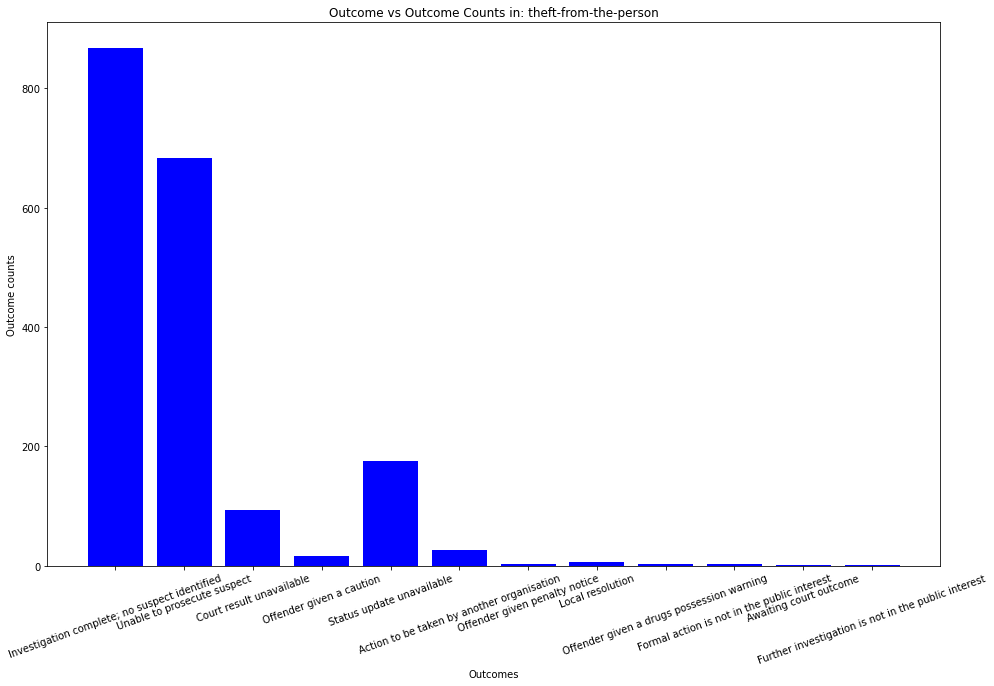

In [467]:


plt.figure(figsize=(16,10))
table = getting_tables(data_df,"theft-from-the-person")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: theft-from-the-person")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=20)
plt.bar(x,y,color="blue")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"theft-from-the-person")
plt.savefig("Outcome vs Outcome Counts in theft-from-the-person.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 1925
Unable to prosecute suspect accounts for : 33.246753246753244% of all cases
Court result unavailable accounts for : 5.662337662337662% of all cases
Investigation complete; no suspect identified accounts for : 44.935064935064936% of all cases
Action to be taken by another organisation accounts for : 1.4545454545454546% of all cases
Status update unavailable accounts for : 12.831168831168831% of all cases
Local resolution accounts for : 0.5714285714285714% of all cases
Offender given a drugs possession warning accounts for : 0.4675324675324675% of all cases
Formal action is not in the public interest accounts for : 0.15584415584415584% of all cases
Offender given a caution accounts for : 0.5194805194805194% of all cases
Awaiting court outcome accounts for : 0.05194805194805195% of all cases
Further investigation is not in the public interest accounts for : 0.1038961038961039% of all cases


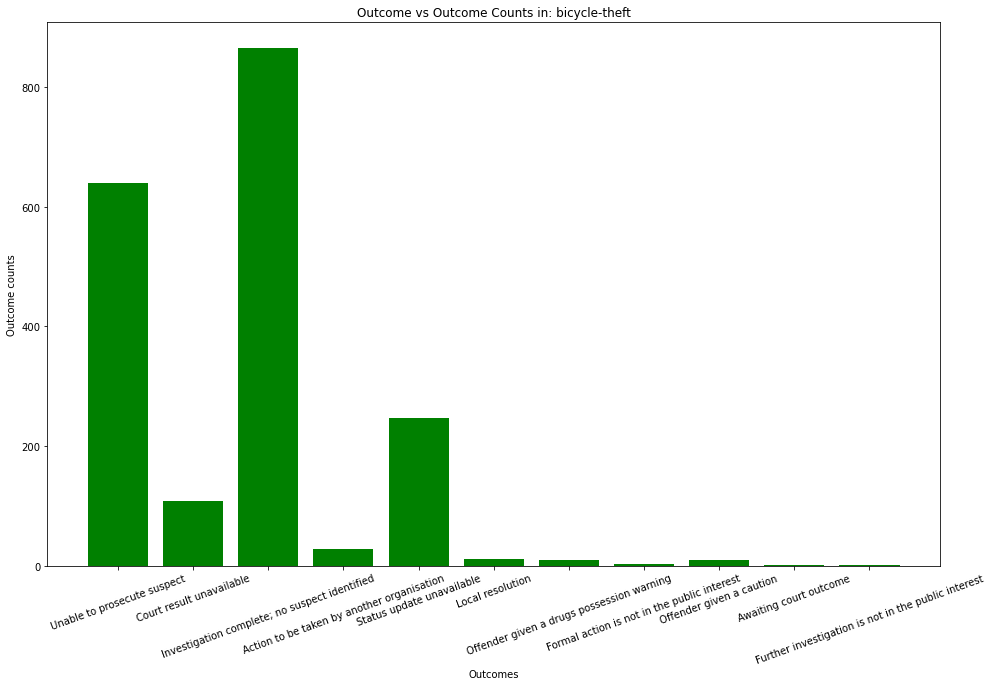

In [468]:
plt.figure(figsize=(16,10))
table = getting_tables(data_df,"bicycle-theft")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: bicycle-theft")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=20)
plt.bar(x,y,color="green")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"bicycle-theft")
plt.savefig("Outcome vs Outcome Counts in bicycle-theft.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 2731
Investigation complete; no suspect identified accounts for : 44.342731600146465% of all cases
Unable to prosecute suspect accounts for : 35.7744415964848% of all cases
Local resolution accounts for : 0.8055657268399854% of all cases
Status update unavailable accounts for : 10.47235444891981% of all cases
Court result unavailable accounts for : 5.931893079458074% of all cases
Action to be taken by another organisation accounts for : 1.1351153423654339% of all cases
Formal action is not in the public interest accounts for : 0.25631636763090443% of all cases
Offender given a drugs possession warning accounts for : 0.2929329915781765% of all cases
Offender given a caution accounts for : 0.8787989747345295% of all cases
Further investigation is not in the public interest accounts for : 0.07323324789454412% of all cases
Suspect charged as part of another case accounts for : 0.03661662394727206% of all cases


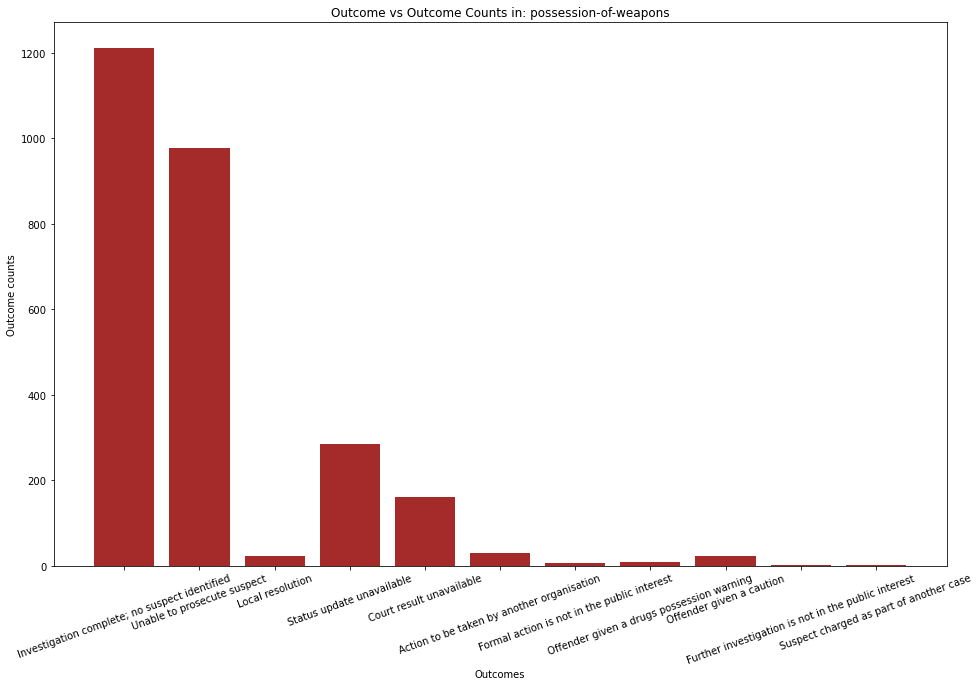

In [469]:
plt.figure(figsize=(16,10))
table = getting_tables(data_df,"possession-of-weapons")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: possession-of-weapons")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=20)
plt.bar(x,y,color="brown")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"possession-of-weapons")
plt.savefig("Outcome vs Outcome Counts in possession-of-weapons.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 4531
Suspect charged as part of another case accounts for : 0.022070183182520416% of all cases
Investigation complete; no suspect identified accounts for : 45.17766497461929% of all cases
Unable to prosecute suspect accounts for : 34.65018759655705% of all cases
Court result unavailable accounts for : 5.958949459280512% of all cases
Local resolution accounts for : 1.2359302582211433% of all cases
Offender given a caution accounts for : 0.7062458618406533% of all cases
Status update unavailable accounts for : 10.064003531229309% of all cases
Formal action is not in the public interest accounts for : 0.28691238137276537% of all cases
Action to be taken by another organisation accounts for : 1.4566320900463474% of all cases
Offender given a drugs possession warning accounts for : 0.24277201500772458% of all cases
Awaiting court outcome accounts for : 0.04414036636504083% of all cases
Offender given penalty notice accounts for : 0.022070183182520416% of all cases
Fur

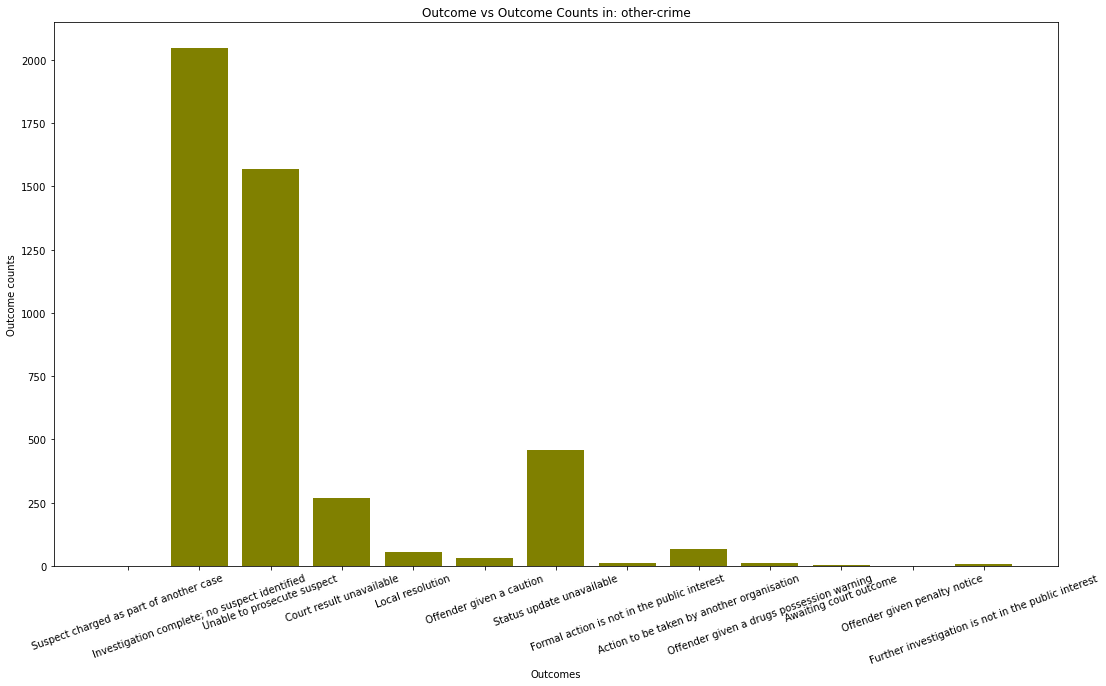

In [470]:
plt.figure(figsize=(18,10))
table = getting_tables(data_df,"other-crime")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: other-crime")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=20)
plt.bar(x,y,color="olive")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"other-crime")
plt.savefig("Outcome vs Outcome Counts in other-crime.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 5061
Unable to prosecute suspect accounts for : 37.7395771586643% of all cases
Investigation complete; no suspect identified accounts for : 43.15352697095436% of all cases
Court result unavailable accounts for : 5.611539221497728% of all cases
Status update unavailable accounts for : 9.721398933017191% of all cases
Action to be taken by another organisation accounts for : 1.1460185734044654% of all cases
Offender given a caution accounts for : 0.6915629322268326% of all cases
Offender given a drugs possession warning accounts for : 0.2766251728907331% of all cases
Local resolution accounts for : 1.0472238688006321% of all cases
Formal action is not in the public interest accounts for : 0.43469670025686624% of all cases
Awaiting court outcome accounts for : 0.07903576368306658% of all cases
Further investigation is not in the public interest accounts for : 0.09879470460383323% of all cases


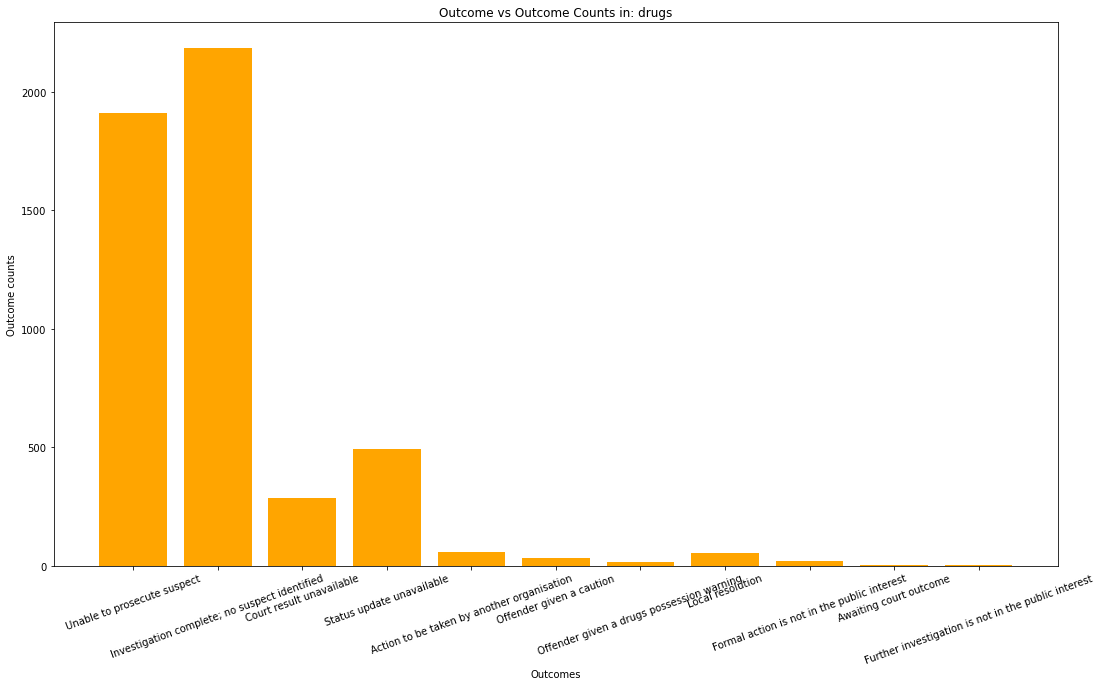

In [471]:
plt.figure(figsize=(18,10))
table = getting_tables(data_df,"drugs")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: drugs")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=20)
plt.bar(x,y,color="orange")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"drugs")
plt.savefig("Outcome vs Outcome Counts in drugs.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 6039
Investigation complete; no suspect identified accounts for : 42.95413147872164% of all cases
Unable to prosecute suspect accounts for : 36.860407352210636% of all cases
Court result unavailable accounts for : 6.47458188441795% of all cases
Local resolution accounts for : 1.0597781089584368% of all cases
Status update unavailable accounts for : 9.753270409008113% of all cases
Action to be taken by another organisation accounts for : 1.556549097532704% of all cases
Offender given a caution accounts for : 0.6292432521940718% of all cases
Further investigation is not in the public interest accounts for : 0.08279516476237787% of all cases
Formal action is not in the public interest accounts for : 0.24838549428713363% of all cases
Offender given a drugs possession warning accounts for : 0.2815035601920848% of all cases
Awaiting court outcome accounts for : 0.0662361318099023% of all cases
Offender given penalty notice accounts for : 0.03311806590495115% of all cas

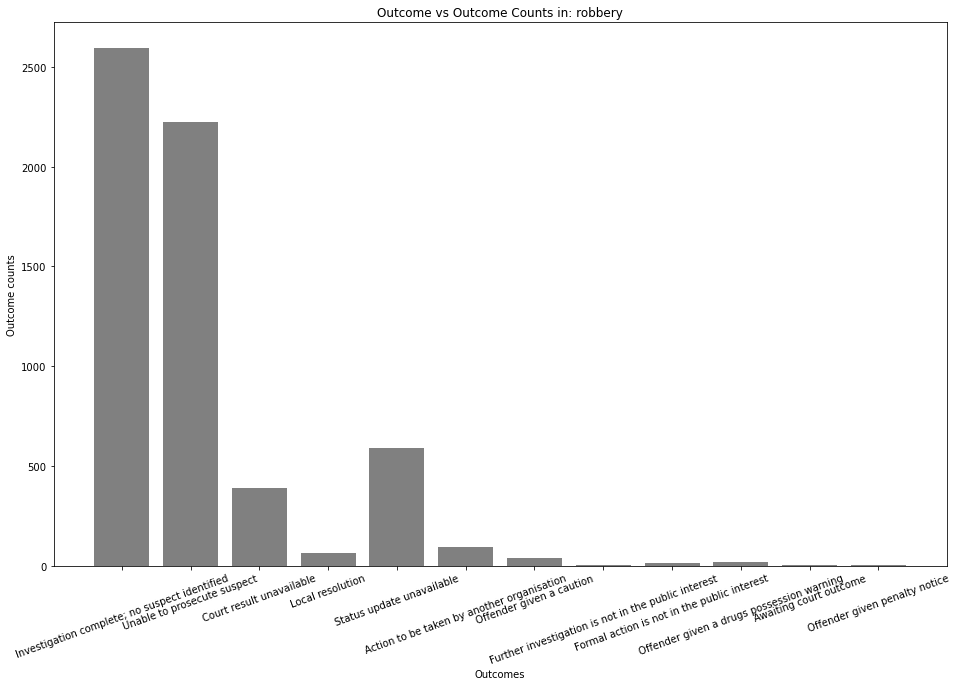

In [472]:
plt.figure(figsize=(16,10))
table = getting_tables(data_df,"robbery")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: robbery")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=20)
plt.bar(x,y,color="grey")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"robbery")
plt.savefig("Outcome vs Outcome Counts in robbery.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 9395
Investigation complete; no suspect identified accounts for : 45.08781266631187% of all cases
Unable to prosecute suspect accounts for : 35.58275678552422% of all cases
Action to be taken by another organisation accounts for : 1.1389036721660457% of all cases
Status update unavailable accounts for : 10.292708887706228% of all cases
Court result unavailable accounts for : 5.960617349654071% of all cases
Further investigation is not in the public interest accounts for : 0.1490154337413518% of all cases
Local resolution accounts for : 0.8515167642362959% of all cases
Offender given a drugs possession warning accounts for : 0.15965939329430548% of all cases
Offender given a caution accounts for : 0.5002660989888238% of all cases
Suspect charged as part of another case accounts for : 0.010643959552953698% of all cases
Formal action is not in the public interest accounts for : 0.18094731240021286% of all cases
Awaiting court outcome accounts for : 0.063863757317722

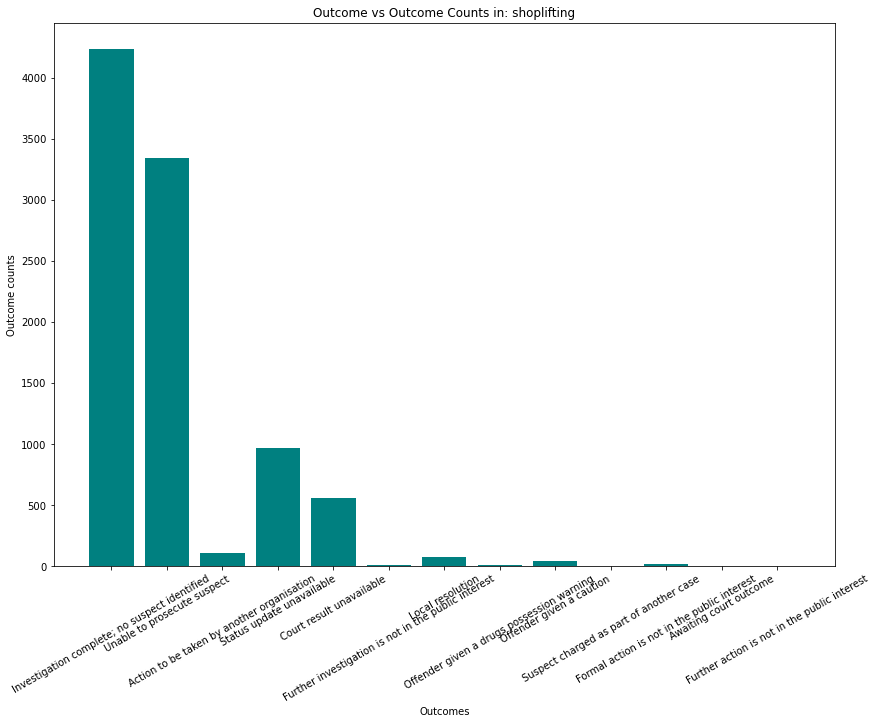

In [473]:
plt.figure(figsize=(14,10))
table = getting_tables(data_df,"shoplifting")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: shoplifting")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=30)
plt.bar(x,y,color="teal")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"shoplifting")
plt.savefig("Outcome vs Outcome Counts in shoplifting.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of crimes: 14014
Unable to prosecute suspect accounts for : 36.42072213500785% of all cases
Investigation complete; no suspect identified accounts for : 43.970315398886825% of all cases
Status update unavailable accounts for : 9.975738547167118% of all cases
Court result unavailable accounts for : 5.922648779791636% of all cases
Suspect charged as part of another case accounts for : 0.06422149279292136% of all cases
Local resolution accounts for : 0.8919651776794635% of all cases
Action to be taken by another organisation accounts for : 1.4414157271300128% of all cases
Offender given a caution accounts for : 0.5994005994005994% of all cases
Offender given a drugs possession warning accounts for : 0.23547880690737832% of all cases
Further investigation is not in the public interest accounts for : 0.12844298558584272% of all cases
Awaiting court outcome accounts for : 0.04995004995004995% of all cases
Formal action is not in the public interest accounts for : 0.2997002997002

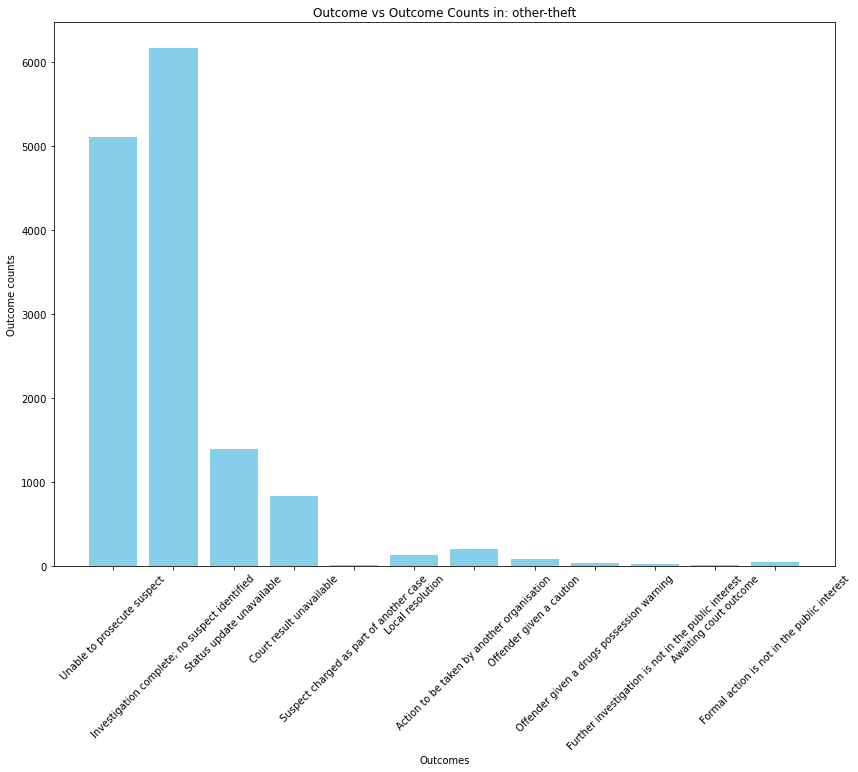

In [448]:
plt.figure(figsize=(14,10))
table = getting_tables(data_df,"other-theft")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: other-theft")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=45)
plt.bar(x,y,color="skyblue")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"other-theft")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 16523
Investigation complete; no suspect identified accounts for : 43.18828299945531% of all cases
Court result unavailable accounts for : 5.9008654602675055% of all cases
Unable to prosecute suspect accounts for : 35.99225322278037% of all cases
Formal action is not in the public interest accounts for : 0.13919990316528474% of all cases
Status update unavailable accounts for : 11.25098347757671% of all cases
Action to be taken by another organisation accounts for : 1.398051201355686% of all cases
Local resolution accounts for : 0.9380863039399625% of all cases
Offender given a caution accounts for : 0.7262603643406161% of all cases
Offender given a drugs possession warning accounts for : 0.24813895781637718% of all cases
Awaiting court outcome accounts for : 0.04236518791986928% of all cases
Further investigation is not in the public interest accounts for : 0.12104339405676935% of all cases
Offender given penalty notice accounts for : 0.02420867881135387% of all

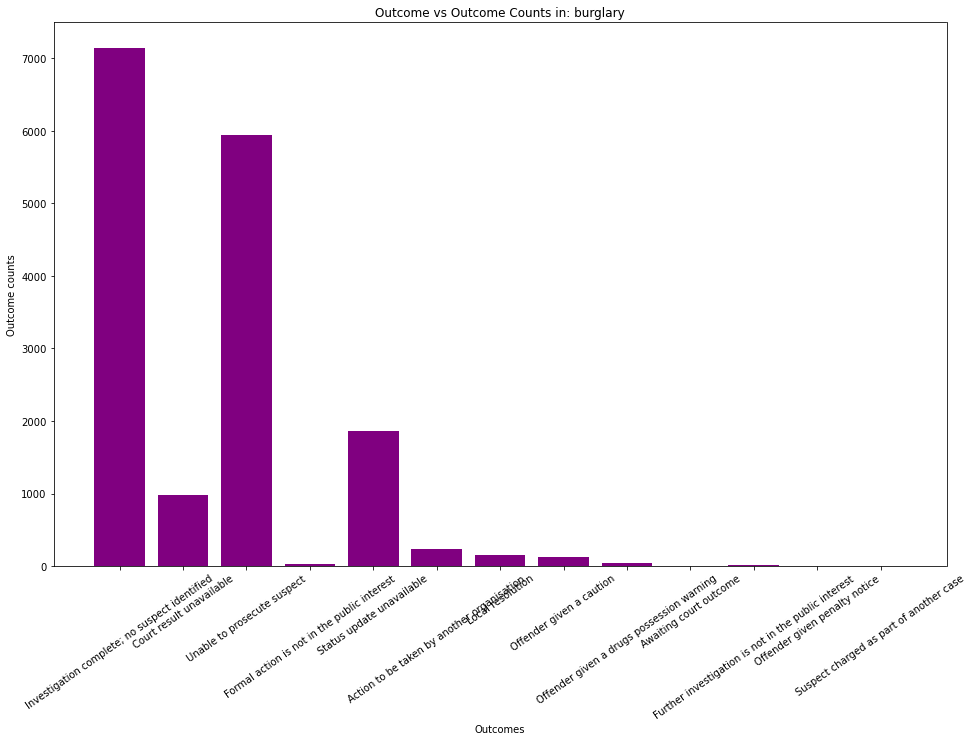

In [474]:
plt.figure(figsize=(16,10))
table = getting_tables(data_df,"burglary")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: burglary")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=35)
plt.bar(x,y,color="purple")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"burglary")
plt.savefig("Outcome vs Outcome Counts in burglary.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 18197
Court result unavailable accounts for : 5.858108479419685% of all cases
Investigation complete; no suspect identified accounts for : 44.41391438149145% of all cases
Unable to prosecute suspect accounts for : 35.02775182722427% of all cases
Status update unavailable accounts for : 10.957850195087103% of all cases
Formal action is not in the public interest accounts for : 0.23630268725614115% of all cases
Action to be taken by another organisation accounts for : 1.3848436555476178% of all cases
Offender given a caution accounts for : 0.7418805297576524% of all cases
Local resolution accounts for : 0.9397153376930263% of all cases
Suspect charged as part of another case accounts for : 0.005495411331538165% of all cases
Offender given a drugs possession warning accounts for : 0.23080727592460298% of all cases
Awaiting court outcome accounts for : 0.09342199263614882% of all cases
Offender given penalty notice accounts for : 0.016486233994614494% of all cases
Fu

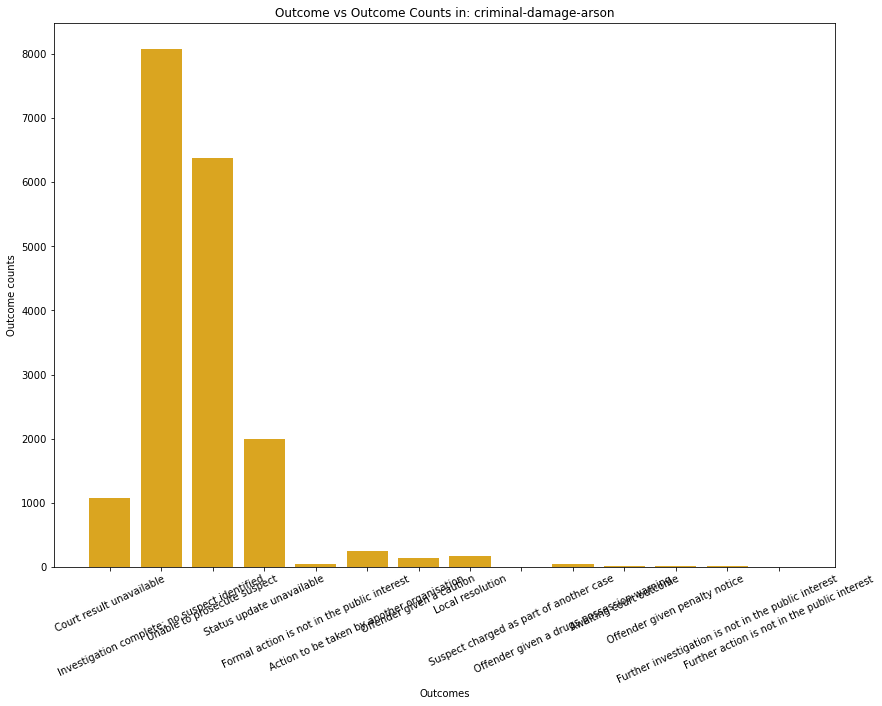

In [482]:
plt.figure(figsize=(14,10))
table = getting_tables(data_df,"criminal-damage-arson")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: criminal-damage-arson")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=25)
plt.bar(x,y,color="goldenrod")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"criminal-damage-arson")
plt.savefig("Outcome vs Outcome Counts in criminal-damage-arson.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 19801
Court result unavailable accounts for : 5.620928235947679% of all cases
Investigation complete; no suspect identified accounts for : 44.50785313873037% of all cases
Unable to prosecute suspect accounts for : 35.755769910610574% of all cases
Local resolution accounts for : 0.8736932478157668% of all cases
Offender given a caution accounts for : 0.7524872481187819% of all cases
Offender given a drugs possession warning accounts for : 0.19695974950760062% of all cases
Status update unavailable accounts for : 10.615625473460936% of all cases
Action to be taken by another organisation accounts for : 1.2827634967930912% of all cases
Suspect charged as part of another case accounts for : 0.015150749962123124% of all cases
Formal action is not in the public interest accounts for : 0.19695974950760062% of all cases
Awaiting court outcome accounts for : 0.07070349982324124% of all cases
Further investigation is not in the public interest accounts for : 0.080803999797

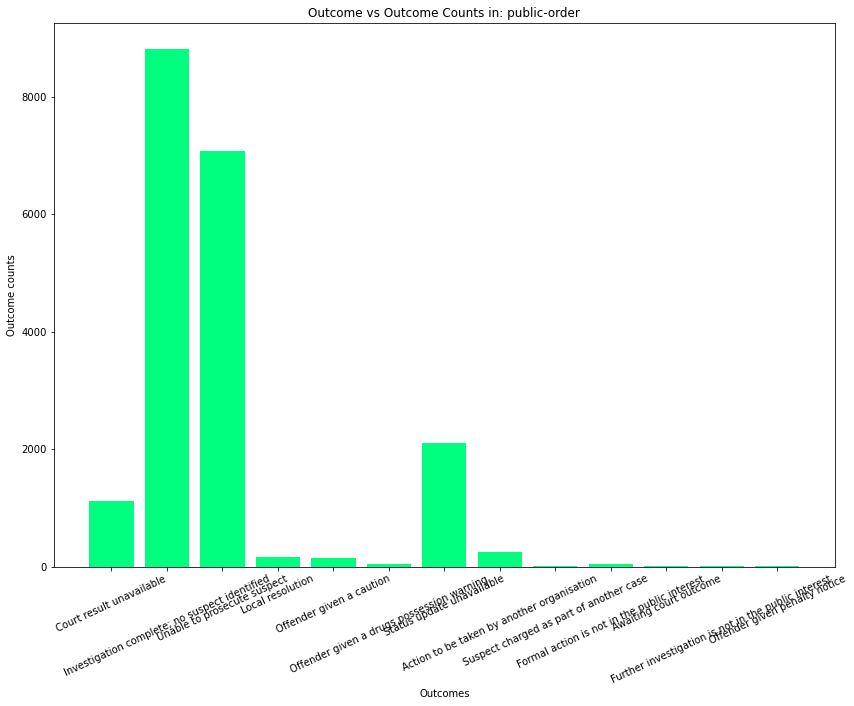

In [476]:
plt.figure(figsize=(14,10))
table = getting_tables(data_df,"public-order")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: public-order")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=25)
plt.bar(x,y,color="springgreen")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"public-order")
plt.savefig("Outcome vs Outcome Counts in public-order.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 22416
Investigation complete; no suspect identified accounts for : 43.700927908636686% of all cases
Court result unavailable accounts for : 5.794967880085653% of all cases
Unable to prosecute suspect accounts for : 35.36313347608851% of all cases
Action to be taken by another organisation accounts for : 1.5524625267665952% of all cases
Local resolution accounts for : 1.0840471092077089% of all cases
Status update unavailable accounts for : 11.157209136331192% of all cases
Offender given a caution accounts for : 0.7137758743754461% of all cases
Offender given penalty notice accounts for : 0.02230549607423269% of all cases
Formal action is not in the public interest accounts for : 0.15613847251962884% of all cases
Offender given a drugs possession warning accounts for : 0.19628836545324768% of all cases
Further investigation is not in the public interest accounts for : 0.14721627408993576% of all cases
Awaiting court outcome accounts for : 0.11152748037116346% of a

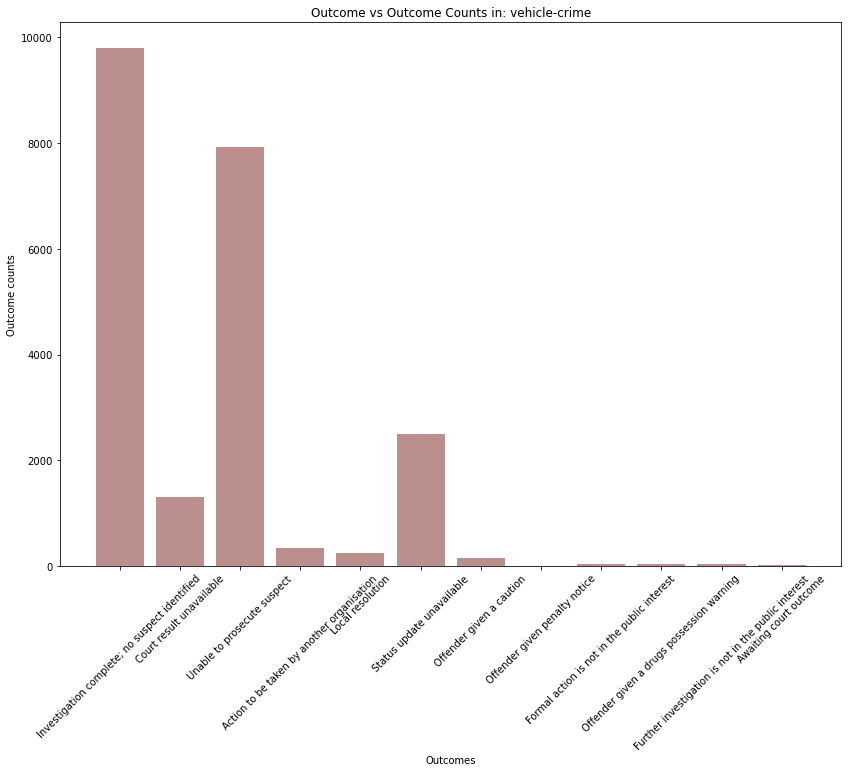

In [483]:
plt.figure(figsize=(14,10))
table = getting_tables(data_df,"vehicle-crime")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: vehicle-crime")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=45)
plt.bar(x,y,color="rosybrown")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"vehicle-crime")
plt.savefig("Outcome vs Outcome Counts in vehicle-crime.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 45459
Investigation complete; no suspect identified accounts for : 44.10347785916981% of all cases
Court result unavailable accounts for : 5.69084229745485% of all cases
Status update unavailable accounts for : 10.327987857189996% of all cases
Unable to prosecute suspect accounts for : 36.069865153214984% of all cases
Formal action is not in the public interest accounts for : 0.22657779537605316% of all cases
Local resolution accounts for : 0.8689148463450582% of all cases
Offender given penalty notice accounts for : 0.035196550738027674% of all cases
Action to be taken by another organisation accounts for : 1.4606568556281485% of all cases
Offender given a caution accounts for : 0.6929320926549198% of all cases
Offender given a drugs possession warning accounts for : 0.2529752084295739% of all cases
Awaiting court outcome accounts for : 0.09899029895070284% of all cases
Further investigation is not in the public interest accounts for : 0.14738555621549088% of al

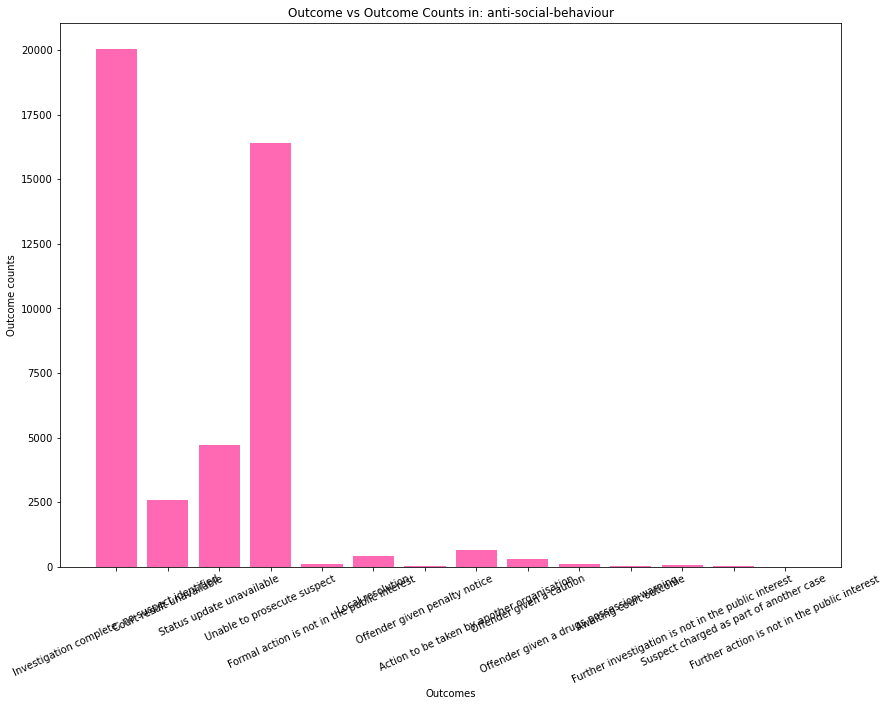

In [484]:
plt.figure(figsize=(14,10))
table = getting_tables(data_df,"anti-social-behaviour")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: anti-social-behaviour")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=25)
plt.bar(x,y,color="hotpink")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"anti-social-behaviour")
plt.savefig("Outcome vs Outcome Counts in anti-social-behaviour.jpg")

<ipython-input-351-f44348f07a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Counts'] = table.groupby(['Outcome']).transform('count')


Total amount of cases: 100441
Unable to prosecute suspect accounts for : 35.08328272319073% of all cases
Action to be taken by another organisation accounts for : 1.2435160940253482% of all cases
Investigation complete; no suspect identified accounts for : 44.52265509104848% of all cases
Local resolution accounts for : 0.8970440358021127% of all cases
Offender given a caution accounts for : 0.7048914287989965% of all cases
Court result unavailable accounts for : 6.1409185491980365% of all cases
Suspect charged as part of another case accounts for : 0.014934140440656704% of all cases
Status update unavailable accounts for : 10.721717227028803% of all cases
Offender given a drugs possession warning accounts for : 0.23396820023695503% of all cases
Offender given penalty notice accounts for : 0.02688145279318207% of all cases
Awaiting court outcome accounts for : 0.06969265538973128% of all cases
Further investigation is not in the public interest accounts for : 0.1125038579862805% of all 

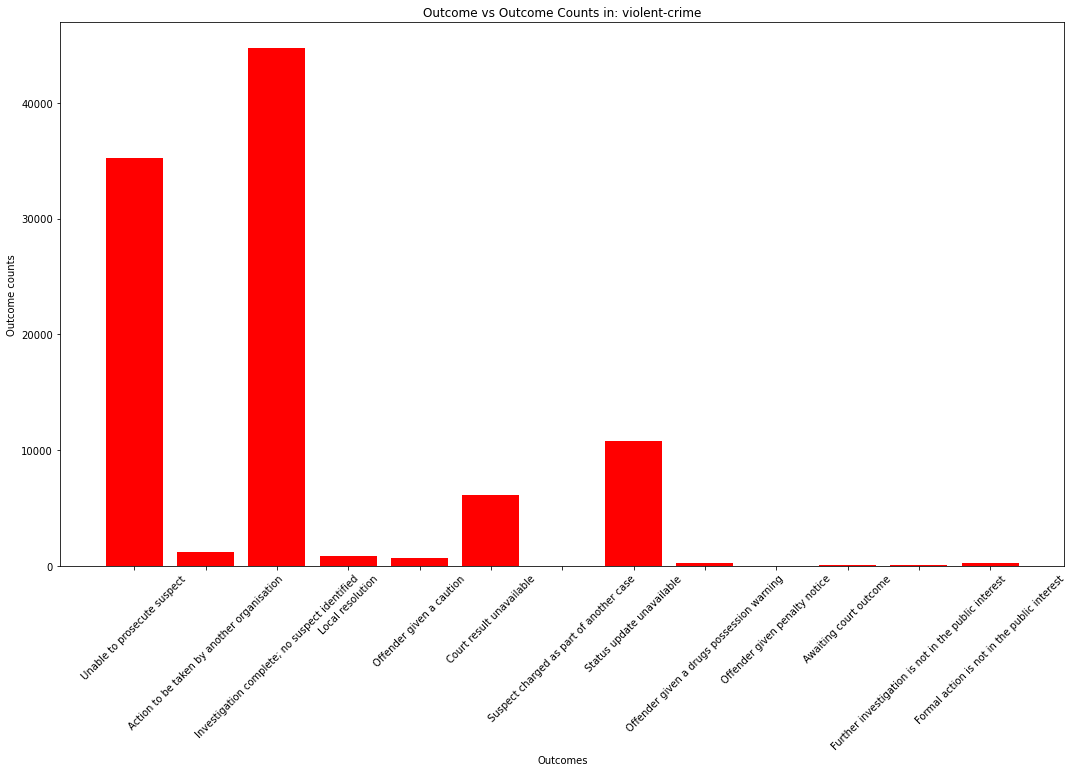

In [481]:
plt.figure(figsize=(18,10))
table = getting_tables(data_df,"violent-crime")
x=table["Outcome"]
y=table["Counts"]
plt.title(f"Outcome vs Outcome Counts in: violent-crime")
plt.xlabel("Outcomes")
plt.ylabel("Outcome counts")
plt.xticks(rotation=45)
plt.bar(x,y,color="red")
plt.show
print(f"Total amount of cases: {len(x)}")
summary_perc(getting_tables,data_df,"violent-crime")
plt.savefig("Outcome vs Outcome Counts in violent-crime.jpg")